In [1]:
import pyforest

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell`==
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously`==
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ▶  Data Import

In [2]:
data = pd.read_csv('medical_market_basket.csv')
data.head()

<IPython.core.display.Javascript object>

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(15002, 20)

# ▶  Data Preparation

### Check for Null Values

In [4]:
# Check for any empty values in rows and columns
print(f'Are there any empty rows? {data.isnull().values.any()}')
print(f'Number of empty columns: {data.columns.isnull().sum()}')

Are there any empty rows? True
Number of empty columns: 0


### Dropping Empty Rows from Dataset

In [5]:
# Drop rows where all elements are NaN
data.dropna(how='all', inplace=True)
data.shape

(7501, 20)

# ▶  Transaction Encoder

In [6]:
from mlxtend.preprocessing import TransactionEncoder

In [7]:
# Convert Dataframe to a List of Lists
rows = []
for i in range (0, data.shape[0]):
    rows.append([str(data.values[i,j])
for j in range(0, data.shape[1])])

In [8]:
# Feed list to Transaction Encoder

DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

# Return array to DataFrame with column names
data1 = pd.DataFrame(array, columns = DE.columns_)

<IPython.core.display.Javascript object>

In [9]:
data1.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,nan,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [10]:
data1.shape

(7501, 120)

### Dropping Null Columns from Transformed Dataset

In [11]:
cleaned_data1 = data1.drop(['nan'], axis=1)
cleaned_data1.head()
cleaned_data1.shape

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

(7501, 119)

### Write Transformed Dataset to CSV

In [12]:
cleaned_data1.to_csv('cleaned_data1.csv', index=False)

This is the final, cleaned dataset we will use for mining

# ▶  Data Mining

In [13]:
cleaned_data1.shape # Confirming our dataset is correct to use

(7501, 119)

What is the 5 most prescribed medications?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

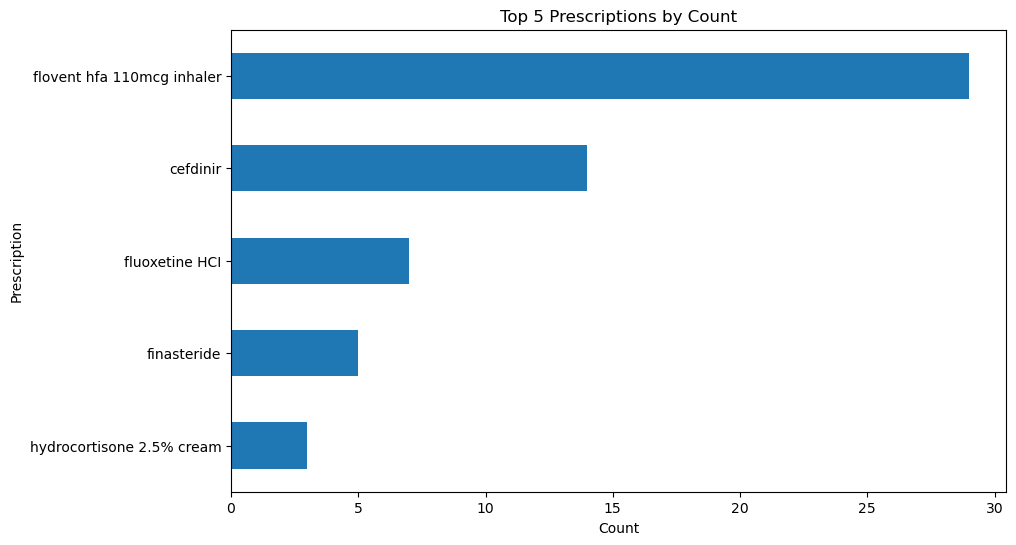

In [14]:
# Count the occurrences of each prescription
prescription_counts = cleaned_data1.sum().sort_values(ascending=True)

# Select the top 5 prescriptions
top_5_prescriptions = prescription_counts.head(5)

# Plot the horizontal bar plot
top_5_prescriptions.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Prescription')
plt.title('Top 5 Prescriptions by Count')
plt.show();

### Creating Apriori Rules

In [15]:
# Import necessary libraries for apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
# Create Rules Object
rules = apriori(cleaned_data1, min_support=0.02, use_colnames=True)
rules.head()

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


### Creating Rules Table

In [17]:
# Generate Frequent Itemsets
frequent_itemsets = apriori(cleaned_data1, min_support=0.02, use_colnames=True)

# Generate Association Rules
rul_table = association_rules(frequent_itemsets, metric="lift", min_threshold=1) # Note: This only works if using mlxtend version 0.23.1 and not the latest 0.23.3

# Display Rules
rul_table.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
6,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
7,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


### Column and Metric Explanations

1. **`antecedents`** and **`consequents`**:
   - **Antecedents**: The drug(s) that appear first in the rule.
   - **Consequents**: The drug(s) predicted to be associated with the antecedents.
   - Example: `(abilify) → (amlodipine)` means that when a patient is prescribed **abilify**, they are likely also prescribed **amlodipine**.

2. **`antecedent support`** and **`consequent support`**:
   - These show how often the antecedent or consequent alone appears in the dataset.
   - Example: For `(abilify)`, `antecedent support = 0.238368` means **abilify** appears in ~23.8% of all prescriptions.

3. **`support`**:
   - The frequency of transactions where both antecedent and consequent occur together.
   - Example: For `(abilify) → (amlodipine)`, `support = 0.023597` means ~2.36% of prescriptions include both **abilify** and **amlodipine**.

4. **`confidence`**:
   - Measures how often the consequent appears, given the antecedent is present.
   - Example: For `(abilify) → (amlodipine)`, `confidence = 0.098993` means **amlodipine** is prescribed ~9.9% of the time when **abilify** is prescribed.

5. **`lift`**:
   - Indicates how much more likely the consequent is to occur with the antecedent compared to random chance.
   - Example: For `(abilify) → (amlodipine)`, `lift = 1.385352` means **amlodipine** is 1.39x more likely to be prescribed with **abilify** than at random.

### Explanation: Rule 1: `(abilify) → (amlodipine)` 

1. **Support**:
   - ~2.36% of all prescriptions include both **abilify** and **amlodipine**.
   - This means the combination occurs in a relatively small but notable proportion of transactions.

2. **Confidence**:
   - ~9.9% of patients prescribed **abilify** are also prescribed **amlodipine**.
   - This indicates that **amlodipine** is prescribed nearly 1 in 10 times when **abilify** is prescribed.

3. **Lift**:
   - 1.39 means that **amlodipine** is 1.39 times more likely to be prescribed alongside **abilify** than by random chance.
   - This suggests a moderate positive association between the two drugs.

4. **Practical Significance**:
   - This rule indicates that **amlodipine** is a common co-prescription with **abilify**. This could be due to therapeutic needs or other clinical factors, warranting further investigation.


### Top Three Rules  

The metric used for the top three rules was Lift.

In medical prescription data, identifying meaningful associations is critical to avoid overemphasizing coincidental relationships.
Lift accounts for the baseline frequency of the drugs, helping to identify truly interesting patterns.


In [18]:
top_three_rules = rul_table.sort_values(by='lift').head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
61,(glyburide),(atorvastatin),0.170911,0.129583,0.023730,0.138846,1.071482,0.001583,1.010756,0.080466
60,(atorvastatin),(glyburide),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645
52,(losartan),(amphetamine salt combo xr),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135,0.077869


### Top Three Rules Explanation

#### Rule 1: `(glyburide) → (atorvastatin)`
1. **Support**:
   - ~2.37% of all transactions include both **glyburide** and **atorvastatin**.
   - This indicates that the combination is present in a small proportion of the dataset.

2. **Confidence**:
   - ~13.88% of patients prescribed **glyburide** are also prescribed **atorvastatin**.
   - This shows a moderate level of reliability for the relationship.

3. **Lift**:
   - 1.071482 indicates that **atorvastatin** is 1.07x more likely to be prescribed with **glyburide** than by random chance.
   - This reflects a slight positive association.

4. **Leverage**:
   - The leverage value of `0.001583` shows that the observed co-occurrence of **glyburide** and **atorvastatin** is marginally higher than expected if they were independent.

5. **Conviction**:
   - A conviction score of `1.010756` indicates that the rule is only slightly better than random for predicting **atorvastatin** when **glyburide** is prescribed.

---

#### Rule 2: `(atorvastatin) → (glyburide)`
1. **Support**:
   - ~2.37% of all transactions include both **atorvastatin** and **glyburide**.
   - Similar to Rule 1, the combination occurs in a small proportion of the dataset.

2. **Confidence**:
   - ~18.31% of patients prescribed **atorvastatin** are also prescribed **glyburide**.
   - This indicates a stronger predictive relationship compared to Rule 1.

3. **Lift**:
   - 1.071482 indicates that **glyburide** is 1.07x more likely to be prescribed with **atorvastatin** than by random chance.
   - Again, this shows a slight positive association.

4. **Leverage**:
   - The leverage value of `0.001583` reflects the slight increase in co-occurrence beyond random chance.

5. **Conviction**:
   - A conviction score of `1.014956` suggests that this rule is slightly more reliable than Rule 1.

---

#### Rule 3: `(losartan) → (amphetamine salt combo xr)`
1. **Support**:
   - ~2.55% of all transactions include both **losartan** and **amphetamine salt combo xr**.
   - This rule has the highest support among the top three rules.

2. **Confidence**:
   - ~19.27% of patients prescribed **losartan** are also prescribed **amphetamine salt combo xr**.
   - This represents the strongest predictive relationship in the top three rules.

3. **Lift**:
   - 1.072479 indicates that **amphetamine salt combo xr** is 1.07x more likely to be prescribed with **losartan** than by random chance.
   - Similar to the first two rules, the positive association is slight.

4. **Leverage**:
   - The leverage value of `0.001721` shows a slightly higher observed co-occurrence compared to random chance.

5. **Conviction**:
   - A conviction score of `1.016135` indicates a marginal improvement over random prediction.
